In [1]:
%matplotlib inline
from BondGraphTools.addons.biochem import Reaction_Network

In [2]:
rn = Reaction_Network(name="Cycle")
rn.add_reaction("X + S = SX = X + P")
rn.add_chemostat("X")
rn.add_flowstat("P")
graph = rn.bond_graph

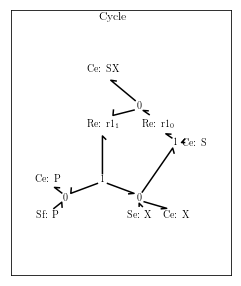

In [3]:
from BondGraphTools.core.layout_manager import arrange
from BondGraphTools.transforms.matplotlib import draw
arrange(graph)
fig = draw(graph)

In [4]:
from BondGraphTools.transforms.latex import bondgraph_to_sympy, reduce, _smith_normal_form
from sympy import init_printing, eye
init_printing()
dx, x, A, B, J, NL = bondgraph_to_sympy(graph)
s, n = reduce(dx, x, A, B, J, NL)

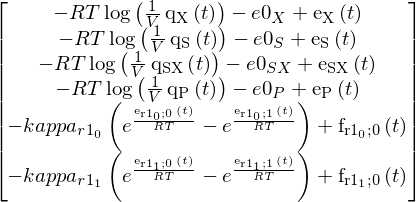

In [6]:
NL

In [21]:
import numpy as np
e = np.eye(3)
e[1,2] = 1
e[2,0] = 4
e


array([[ 1.,  0.,  0.],
       [ 0.,  1.,  1.],
       [ 4.,  0.,  1.]])

In [53]:
e.sum(1, keepdims=True)

array([[ 1.],
       [ 2.],
       [ 5.]])

In [67]:
z = np.array([1,2,3], ndmin=2).transpose()


In [68]:
z

array([[1],
       [2],
       [3]])